# Introduction

## Domain-specific area
The domain-specific area that I have chosen is related to the healthcare industry. There are many areas in the healthcare industry that can benefit from machine learning and most of these areas are about determining the probability of a patient having a specific type of disease, such as diabetes based on blood pressure, glucose level and other symptoms. However, in this project, we will be building a regression model to identify whether a person is obese based on his or her height and weight. This is possible as there are already current studies to determine a person's body mass index using the same factors, which are are height and weight. It is important to know the state of one's body as obesity can lead to many deadly diseases such as diabetes and cancer. With the use of a regression model, healthcare workers will be able to calculate the probability and predict whether person is obese. Healthcare workers can then advise patients on follow up procedures to maintain a healthy body such as exercising more or eating less food with high calories. This can benefit the society as people will be able to understand more about the state of their bodies, whether they are close to being obese, and this knowledge can potentially save someone's life.

## Dataset
I have identified a suitable dataset from [Kaggle](https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex) (Ersever, n.d.), a recommended website with thousands of available datasets for download. The dataset that I have decided to use is a CSV file consisting of the height, measured in centimeters, weight, measured in kilograms and an index ranging from 1 to 5 for 500 personel. Here is a description of the index column:

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

I believe this dataset is suitable for the aim of the project as 500 data in size is neither too small or too big, but just the right amount. Furthermore, it includes the important factors that my project must acquire to fulfill the objectives. Following the implementation of the project, I will be separating the dataset into two parts, namely the training set and the test set, with 80% of initial data in the training set and 20% of initial data in the test set. The training data is used to build the regression model while the test set is used to test the accuracy of the regression model.

Below are some codes to display the data types of each column and the dataset.

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

#load the csv file
df = pd.read_csv('BMI.csv')

#display the data types of each attribute
print(df.dtypes)

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object


In [2]:
from IPython.display import display

#display the dataset
display(df)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


## Objectives of the project
The objective of this project is to predict whether a person is obese based on his or her height and weight. By building this regression model, we will be able to predict the probability of a person being obese and their chances of getting other diseases which can be deadly, such as heart diseases and breathing problems. This will greatly benefit the society and as one always says, "Prevention is better than cure". Furthermore, height and weight are two very easily measured units where most people can measure themselves comfortably at home, so it is really an accessible instrument using height and weight to check whether one is at low or high risk of being obese. Once this regression model has been built, people will be able to access it and check for themselves. From there, the model can reply with a few suggestions to achieve a healthier body as a reminder. Regarding the ML approach to accomplishing the aim of this project and knowing that we have two deciding factors, namely height and weight, and the binary outcome is whether a person is obese or not, I have decided to use multiple logistic regression to identify the pattern and relationship from height and weight to obesity.

# Implementation
We have already stored the dataset, which is a CSV File, locally in this enviroment as shown above, so the next step is to preprocess the data by removing data with missing values and group some datas together, in this case, under the index column, 0-3 is defined as not obese and 4-5 is defined as obese. Once the "Obese" column has been created, we can remove the "Index" and "Gender" columns which are unnecessary. We will also check if the preprocessed dataset is in First Normal Form (1NF) where only atomic values exist in each column.

## Pre-processing

In [3]:
# fixing the problem of missing values
df.isnull().sum()
df = df.dropna()
df = df.fillna(df.mean(numeric_only=True))

# changing the column "Index" to "Obese" and 0 means not obese and 1 means obese
df['Obese'] = np.where(df['Index'] < 4, '0', '1')

# removing the column "Index"
df = df.drop('Index', axis=1)

# removing the column "Gender"
df = df.drop('Gender', axis=1)

# check each column has atomic values
for column in df.columns:
    if not df[column].apply(lambda x: isinstance(x, (int, float, str))).all():
        print(f'Column {column} is not in 1NF')
    else:
        print(f'Column {column} is in 1NF')

#display the data types of each attribute
print(df.dtypes)

#display the new dataset
display(df)

Column Height is in 1NF
Column Weight is in 1NF
Column Obese is in 1NF
Height     int64
Weight     int64
Obese     object
dtype: object


,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0
...,...,...,...
495,150,153,1
496,184,121,1
497,141,136,1
498,150,95,1


## Statistical Analysis

In [4]:
# measures of central tendency

# changing the data type of Obese from object to integer
df = df.astype({'Obese':'int'})

# mean of height, weight
df.mean()

Height    169.944
Weight    106.000
Obese       0.656
dtype: float64

In [5]:
# number of obese for 500 personnel
df['Obese'].value_counts()

1    328
0    172
Name: Obese, dtype: int64

In [6]:
# calculating median of the dataset
df.median()

Height    170.5
Weight    106.0
Obese       1.0
dtype: float64

In [7]:
# calculating mode of the dataset
df.mode()

,Height,Weight,Obese
0,188.0,50,1.0
1,NaN,80,NaN
2,NaN,104,NaN


In [8]:
# displays a statistical summary of the dataframe
df.describe()

,Height,Weight,Obese
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,0.656000
std,16.375261,32.382607,0.475517
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,0.000000
50%,170.500000,106.000000,1.000000
75%,184.000000,136.000000,1.000000
max,199.000000,160.000000,1.000000


In [9]:
# measures of spread

# calculate range
def range(x):
    return max(x) - min(x)

print('The range for Height is:', range(df['Height']))
print('The range for Weight is:', range(df['Weight']))
print('The range for Obese is:', range(df['Obese']))

# calculate interquartile range
def interquartile(y):
    q1, q3 = np.percentile(y, [25,75])
    return q3 - q1

print('The interquartile range for Height is:', interquartile(df['Height']))
print('The interquartile range for Weight is:', interquartile(df['Weight']))
print('The interquartile range for Obese is:', interquartile(df['Obese']))

# calculate variance
print('The variance for Height is:', statistics.variance(df['Height']))
print('The variance for Weight is:', statistics.variance(df['Weight']))
print('The variance for Obese is:', statistics.variance(df['Obese']))

# calculate standard deviation
print('The standard deviation for Height is:', statistics.stdev(df['Height']))
print('The standard deviation for Weight is:', statistics.stdev(df['Weight']))
print('The standard deviation for Obese is:', statistics.stdev(df['Obese']))

The range for Height is: 59
The range for Weight is: 110
The range for Obese is: 1
The interquartile range for Height is: 28.0
The interquartile range for Weight is: 56.0
The interquartile range for Obese is: 1.0
The variance for Height is: 268.1491623246493
The variance for Weight is: 1048.633266533066
The variance for Obese is: 0.22611623246492987
The standard deviation for Height is: 16.375260679593755
The standard deviation for Weight is: 32.38260746964435
The standard deviation for Obese is: 0.4755168056598314


This is not a uniform distribution
This is a left skewed distribution


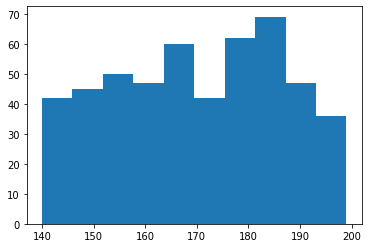

In [10]:
# plotting histogram to check the type of distribution
plt.hist(df['Height'])
plt.show

# check if the distribution is uniform
if kurtosis(df['Height']) == 0:
    print("This is a uniform distribution")
else:
    print("This is not a uniform distribution")

# check if the distribution is left skewed or right skewed
if skew(df['Height']) < 0:
    print("This is a left skewed distribution")
elif skew(df['Height']) > 0:
    print("This is a right skewed distribution")

This is not a uniform distribution
This is a left skewed distribution


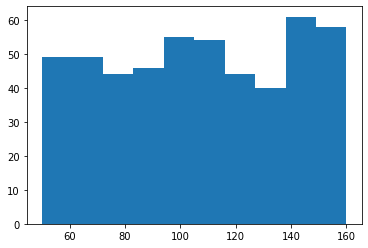

In [11]:
# plotting histogram to check the type of distribution
plt.hist(df['Weight'])
plt.show

# check if the distribution is uniform
if kurtosis(df['Weight']) == 0:
    print("This is a uniform distribution")
else:
    print("This is not a uniform distribution")

# check if the distribution is left skewed or right skewed
if skew(df['Weight']) < 0:
    print("This is a left skewed distribution")
elif skew(df['Weight']) > 0:
    print("This is a right skewed distribution")

This is a non-symmetrical bimodal distribution.


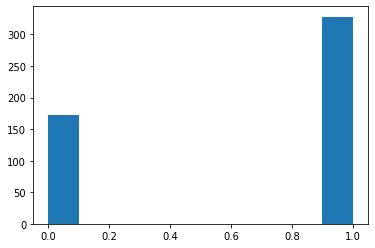

In [12]:
# plotting histogram to check the type of distribution
plt.hist(df['Obese'])
plt.show

# to check if there is symmetry, we calculate the skew of the bimodal distribution
if skew(df['Obese']) == 0:
    print('This is a symmetrical bimodal distribution.')
else:
    print('This is a non-symmetrical bimodal distribution.')

## Data Visualization
The graphs that I feel are appropriate for this project are mainly scatter plot, bar graph, box plot and density plot. Firstly, I will be creating a scatter graph portraying the relationship between only two factors, Weight and Obese, just to see whether there is a distinct relationship between them.

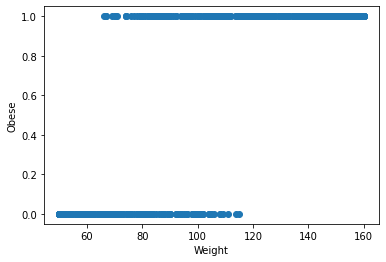

In [13]:
# plots a scatter plot between Weight and Obese
plt.scatter(df['Weight'], df['Obese'])

plt.xlabel("Weight")
plt.ylabel("Obese")

plt.show()

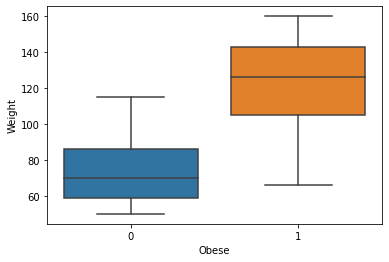

In [14]:
# plots a box plot between Obese and Weight
sns.boxplot(x='Obese', y='Weight', data=df)

plt.show()

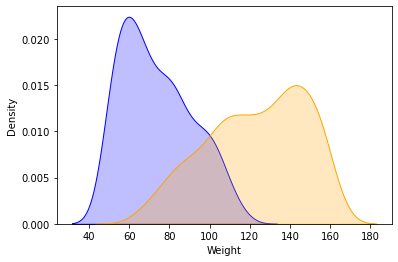

In [15]:
# plots a density plot between Obese and Weight
sns.kdeplot(data=df[df['Obese']==0]['Weight'], shade=True, color='blue')
sns.kdeplot(data=df[df['Obese']==1]['Weight'], shade=True, color='orange')

plt.show()

As we can see from the above scatter plot, there is a distinct relationship between Weight and Obese. There is no personnel below the weight of approximately 60kg who is obese and personnel above the weight of approximately 120kg are obese. This implies that the dataset is a good measure for logistic regression due to the S-shape graph from the scatter plot.

Next, we will be plotting a bar graph to showcase the relationship between Height and Obese.

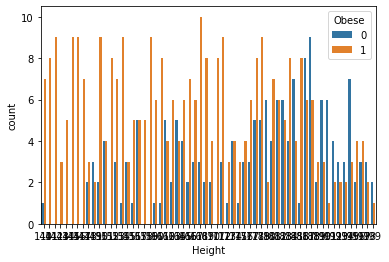

In [16]:
# plots a bar chart between Height and Obese
sns.countplot(x='Height', hue='Obese', data=df)

plt.show()

As we can see from the above bar graph, there is no clear relationship between Height and Obese. Any personnel, regardless of any height, can become obese. Therefore, the relationship between Weight and Obese is clearer than between Height and Obese.

Now, we will plot a 2D scatter graph and a 3D scatter graph, just for a more diversed visualization, between the three attributes, Height, Weight and Obese.

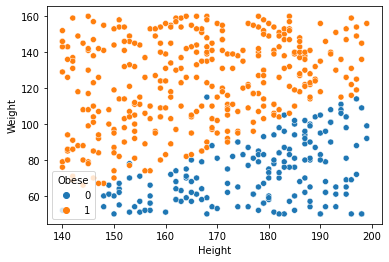

In [17]:
# plots a scatter plot for the three attributes
sns.scatterplot(x='Height', y='Weight', hue='Obese', data=df)

plt.show()

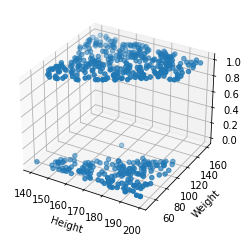

In [18]:
# plots a 3d scatter plot for the three factors
# building the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Height'], df['Weight'], df['Obese'])

plt.xlabel("Height")
plt.ylabel("Weight")

plt.show()

## Building ML Model
The features, which are the input variables, are Height and Weight. They will be used to predict about the label, which is the target or output variable, Obese. The features are selected because they are good factors to determine the obesity of a person, such as Body Mass Index. These variables are important in the regression model as they will be used to generate a function, generally a mathematical equation, that maps the features to the label.

My chosen ML approach is multiple logistic regression, because I have two features and a label with a binary value. Firstly, I will divide the dataset into a training set and a test set, with 80% of the initial dataset in the training set and 20% in the test set. I will use the training set to form the regression model and then use the test set to test the accuracy of the model.

In [19]:
# split the data into training and test datasets, with 20% of data in the test set
X_train, X_test, y_train, y_test = train_test_split(df[['Height', 'Weight']], df['Obese'], test_size=0.2)

# display the size of the training and test sets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (400, 2)
y_train: (400,)
X_test: (100, 2)
y_test: (100,)


In [20]:
# creating the logistic regression model
mlr = LogisticRegression()
mlr.fit(X_train, y_train)

# initialise predictions on the test set
prediction = mlr.predict(X_test)

# calculate the accuracy of the model
accuracy = mlr.score(X_test, y_test)
print('The accuracy of the model is:', accuracy)

The accuracy of the model is: 0.98


As of this stage, we have successfully built the regression model, "mlr", to predict the obesity of a person based on his or her height and weight. The accuracy of the model tested from the training set on the test set is 98%, which is a very good result. Below are some codes to predict the obesity of a person provided his or her height and weight. As a reminder, 0 means not obese and 1 means obese. There is an error message about invalid feature names but we can ignore it as the code works and we have our output, which is the prediction.

In [21]:
# here to input new values for the features
Height = 180
Weight = 90
newInput = [[Height, Weight]]

# prediction
newPrediction = mlr.predict(newInput)[0]
print('The prediction is:', newPrediction)

The prediction is: 0


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Conclusion

## Results of the ML Model
To test whether the regression model is a good model for predicting the data, I will write some code to calculate the RMSE value.

In [22]:
# calculate the mean squared error
mse = mean_squared_error(y_test, prediction)

# calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.1414213562373095


As we can see from the code above, the RMSE value is very low, which implies that the regression model is a good fit for the data and predicting the obesity of a person based on his or her height and weight. I am very satisfied with this regression model because the accuracy of the regression model trained with the training set and tested on the test set is 99%, as a form of cross-validation testing, and the RMSE value is very low. In conclusion, the regression model is a suitable and appropriate measure of the data to make a prediction.

## Evaluation of the project and its results
With the regression model that is built, I am confident that the healthcare industry can implement this model to help patients determine their obesity level based on accessible data which is their height and weight, and from there, advise them on what to do to maintain a healthy lifestyle. This will prevent more people from getting diseases such as heart disease or diabetes and prolong the patient's life. I believe this data might be able to be transferred to other domain-specific area such as marketing industry, if a fitness company wants to promote their gym membership to an obese customer to encourage physical activities for cutting calories or the food and beverage industry for promoting their healthier choices of food.

There are many other methods for machine learning, be it different programming languages such as R and Java, development environments such as RStudio and Eclipse, and machine learning algorithms such as reinforcement learning algorithms, that I can use. However, the ML libraries used in this project are most likely the main libraries for a ML project, provided that the programming language is python. There are other benefits from using other programming languages, such as C++ having quick execution time, but python is definitely one of the most popular for its versatility. I believe the aim of this project can also be achieved with other machine learning approaches such as k-means clustering in unsupervised learning to cluster data into either obese or not obese, meaning k = 2 as there are 2 clusters.

To better the performance of this model, other feature variables can be taken into consideration, such as diet and physical activities, into the model. The more the features, the better and accurate the prediction.

# References
Ersever, Y. (n.d.). 500 Person Gender-Height-Weight-Body Mass Index | Kaggle. Retrieved from Kaggle: https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex



In [5]:
import numpy as np

# Define the confusion matrix
confusion_matrix = np.array([[20, 6, 4], [3, 16, 1], [1, 2, 7]])

# Calculate the precision and recall for each class
AP = []
AR = []
for i in range(3):
    TP = confusion_matrix[i, i]
    FP = np.sum(confusion_matrix[:, i]) - TP
    FN = np.sum(confusion_matrix[i, :]) - TP
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    AP.append(precision)
    AR.append(recall)

# Compute the average precision and recall
AP_mean = np.mean(AP)
AR_mean = np.mean(AR)

# Print the results
print(AP)
print('Average precision:', AP_mean)
print('Average recall:', AR_mean)

[0.8333333333333334, 0.6666666666666666, 0.5833333333333334]
Average precision: 0.6944444444444445
Average recall: 0.7222222222222223
